# Fall 2021 - Section 01 - Project 2

## Members
* Ethan Kamus
* Nathaniel Marquez
* Rebecca Lee

**Project Description:**
Use `NumPy` to implement vectorized linear and polynomial regression models and compare their performance using separate training and test sets. Visualizaions will be implemented using the `Matplotlib` framework. Data used in project: https://drive.google.com/file/d/1xQyRqwOTqUCMv-W7vBXeGq2rkh0okkOi/view

# Experiment 1

* We used `numpy.load()` to load the dataset
* We removed the first line in the dataset since it was a title row

In [389]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('dataset.csv',delimiter=',',skiprows=1)

# Experiment 2

* Here we partitioned the data into the training and test sets
* The first 900 rows are deligated to the training set and the last 100 to the test set

In [390]:
training_set = data[0:900]
test_set = data[900:1000]

len(training_set), len(test_set)

(900, 100)

# Experiment 3

* Given the features, we used `np.linalg.inv()` to solve for the optimal weights

## Results for this experiment

$$ y = 0.69333661 + 0.03664626x_1 + 0.02839225x_2 $$

In [391]:
# convert training set into a 2D array
training_set = np.array(training_set)

# create x1 and x2 feature vectors
x1 = training_set[0:900,[0]]
x2 = training_set[0:900,[1]]

# create feature matrix with ones column for the coefficient and x1, x2 attributes
X = np.hstack((np.ones_like(x1),x1,x2))

# create target column vector
t = training_set[0:900,[2]] # matrix of output?
t = t.reshape(900,)

# differentiate with respect to w to get optimal weight values
XX = np.dot(X.T,X)
inverse_XX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
w = np.dot(inverse_XX,Xt)

w

array([0.69333661, 0.03664626, 0.02839225])

# Experiment 4

* using the weights we calculated in experiment 3, we made predictions using our model
* after calculating the predictions, we compare them to our target vector
* squaring this difference and dividing by the number of predictions made, we result in our average squared loss (MSE)

## Results for this experiment

$$ MSE = 8.593335839184915 $$

In [392]:
w_0 = w[0]
w_1 = w[1]
w_2 = w[2]

predictions = []
for i in X:
    predictions = np.append(predictions, [[w_0 + (i[1]*w_1) + (i[2]*w_2)]])
loss = t - predictions
loss = np.square(loss)
avg_sq_loss = np.sum(loss)/len(loss)
avg_sq_loss

8.593335839184915

# Experiment 5

* This experiment is conducted similar to experiment 3, the only difference being that we added two more columns to our feature matrix
    * These two extra columns are the same features we had before, but squared
    * This increases the order of our equation to 2
    
* The rest of the of the experiment is conducted as follows:
    * use our newly calculated weights to make predictions
    * compare predictions to our target vector
    * calculate average squared loss
    
## Results of this experiment
* MSE = 8.587120688069552
* Resulting equation: 
$$ y = 0.61472518 + 0.03564374x_1 + 0.03013081x_2 + 0.02423326x_1^2 + 0.00411616x_2^2 $$

In [393]:
# create feature matrix
X = np.hstack((np.ones_like(x1),x1,x2, np.square(x1), np.square(x2)))
XX = np.dot(X.T,X)
inverse_XX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
wq = np.dot(inverse_XX,Xt)
print(wq)

wq_0 = wq[0]
wq_1 = wq[1]
wq_2 = wq[2]
wq_12 = wq[3]
wq_22 = wq[4]

# find optimal weights
predictions = []
for i in X:
    predictions = np.append(predictions, [[wq_0 + (i[1]*wq_1) 
                                     + (i[2]*wq_2) 
                                     + ((i[3])*wq_12) 
                                     + ((i[4])*wq_22)]])
# find average square loss
loss = t - predictions
loss = np.square(loss)
avg_sq_loss = np.sum(loss)/len(loss)
avg_sq_loss

[0.61472518 0.03564374 0.03013081 0.02423326 0.00411616]


8.587120688069552

# Experiment 6

* In this experiment, we are testing the linear and quadratic models we created by giving it new data from the test set
* Afterward, we calculate average squared loss to determine which model performs better

## Results from this experiment

* Using the target set
    * MSE for linear model = 7.935256784533436
    * MSE for quadratic model = 7.882170673013778
* Based on these two values, we can conclude that the quadratic model is a better fit to the data
    * *Note: the MSE values for both models are very close to each other. This may be a result of the data.*

In [394]:
test_set = np.array(test_set)
x1 = test_set[0:,[0]]
x2 = test_set[0:,[1]]
t = test_set[0:,[2]]
t = t.reshape(100,)

# linear
X = np.hstack((np.ones_like(x1),x1,x2))
lin_predictions = []
for i in X:
    lin_predictions = np.append(lin_predictions, [[w_0 + (i[1]*w_1) + (i[2]*w_2)]])
loss = t - lin_predictions
loss = np.square(loss)
test_mse = np.sum(loss)/len(loss)

# quadratic
X = np.hstack((X, np.square(x1), np.square(x2)))
quad_predictions = []
for i in X:
    quad_predictions = np.append(quad_predictions, [[wq_0 + (i[1]*wq_1) 
                                     + (i[2]*wq_2) 
                                     + ((i[3])*wq_12) 
                                     + ((i[4])*wq_22)]])
loss = t - quad_predictions
loss = np.square(loss)
test_mse_q = np.sum(loss)/len(loss)
test_mse, test_mse_q

(7.935256784533436, 7.882170673013778)

# Experiment 7

* Using the training set created in experiment 1, we perform 5-fold cross validation
* Explanation for each function:
    * `calculate_loss`: Accepts the feature matrix as well as the weights and target vectors.
        * It will calculate and return the average squared loss.
    * `calculate_weights`: This function is called within the `cross_validation` function. 
        * As it's parameters, it takes the polynomial order, the feature vectors x1 and x2, the target vector, and a boolean indicating whether the data is from the validation set. 
        * If data is from the training set, we will return both the calculated weights and the feature matrix as a tuple.
        * If from the validation, we return only the matrix of features because we do not want to compute new weights.
    * `cross_validation`: Conducts 5-fold validation.
        * As it's parameters, it accepts polynomial order and the training data.
        * From this, it will split the training data into 5 folds based of the length of the training data.
        * Cross-Validation is run five times for each polynomial order, with each fold taking turns in acting as the validation set.
        * This function will call `calculate_weights` and `calculate_loss` to determine the average squared training and validation loss for each polynomial order. These calculations are stored into their respective global array.

## Results from this experiment

| polynomial order | avg training MSE | avg validation MSE |
| :----: | :--- | :--- |
|1|8.585424175136499|8.664561780661654|
|2|8.570015371698974|8.744172714794733|
|3|8.562578349639221|8.810585695415508|
|4|8.534275710525652|8.939061380507972|
|5|8.42451734640557|9.177323874191242|
|6|8.402263856675855|8.833396216294389|
|7|8.38645590352802|8.888724100286215|
|8|8.37100125996366|9.654768907623456|

In [395]:
def calculate_loss(weights, X_vector, t_vector):
    predictions = []
    for row in X_vector:
        temp = 0
        for j in range(int(len(weights))):
            temp = temp + (row[j] * weights[j])
        predictions = np.append(predictions, temp)
    loss = t_vector - predictions
    loss = np.square(loss)
    mse = np.sum(loss)/len(loss)
    return mse

In [396]:
def calculate_weights(order, x1, x2, target_set, isValidation = False):
    X_order = np.ones_like(x1)
    for x in range(1, order+1):
        X_order = np.hstack((X_order, np.power(x1, x), np.power(x2,x)))
    
    if (isValidation):
        return X_order

    XX_order = np.dot(X_order.T,X_order)
    inverse_XX_order = np.linalg.inv(XX_order)
    Xt_order = np.dot(X_order.T,target_set)
    w_order = (np.dot(inverse_XX_order,Xt_order))
    
    
    return w_order, X_order # return as a tuple in python

In [397]:
training_loss = []
validation_loss = []
def cross_validation(order, training_data):
    k = 5
    fold = int(len(training_data) / k)
    
    for i in range(1, order+1):
        j = 0
        test_mse, cv_mse = 0, 0
        for f in range(1, k+1):
            validation = np.array(training_data[int(j*fold):int(f*fold)])
            training = np.delete(training_data, slice(int(j*fold),int(f*fold)), 0)
            valid_x1, valid_x2, valid_t = validation[0:,[0]], validation[0:,[1]], validation[0:,[2]]
            valid_t = valid_t.reshape(valid_t.size)
            
            training_x1, training_x2, training_t = training[0:,[0]], training[0:,[1]], training[0:,[2]]
            training_t = training_t.reshape(training_t.size)
            
            t_results = calculate_weights(i, training_x1, training_x2, training_t)
            weights = t_results[0]
            tX_order = t_results[1]

            vX_order = calculate_weights(i, valid_x1, valid_x2, valid_t, isValidation = True)
            
            test_mse += calculate_loss(weights, tX_order, training_t)
            cv_mse += calculate_loss(weights, vX_order, valid_t)
            j += 1
        training_loss.append(test_mse / k)
        validation_loss.append(cv_mse / k)

In [398]:
cross_validation(8, training_set)
# 'Training Loss Results: ', training_loss , 'Validation Loss Results: ', validation_loss

# Experiment 8

* From the data created in experiment 7, we graph the polynomial order vs. the average mse
* one line is dedicate to the average squared training loss and the other to the average squared validation loss
* To plot these lines, we used the `matplotlib` python library

## Results from this experiment
* Based on the resulting graph, the point at which the models begin to overfit (when the two lines diverge) is at order 2.

Text(0, 0.5, 'Average MSE')

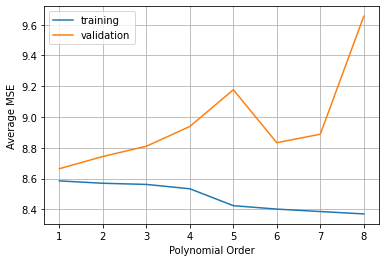

In [399]:
x = np.arange(1,9,1)
line1, = plt.plot(x, training_loss, label='training')
line2, = plt.plot(x, validation_loss, label='validation')
leg = plt.legend(loc='upper left')
plt.grid(True)
plt.xlabel('Polynomial Order')
plt.ylabel('Average MSE')

# Experiment 9

* Based on the conclusion from experiment 8, we can determine that the best fit model is the **linear model**
* We recalculate the weights and test them against the test set
    * From this, we can confirm that the equation found in this experiment is the same as the equation from experiment 3

## Results from this experiment
* **FINAL TEST MSE** = 7.935256784533436
* **FINAL EQUATION FOR LINEAR MODEL**:
$$ y = 0.69333661 + 0.03664626x_1 + 0.02839225x_2 $$


In [400]:
# Use the entire training set to fit the best model given the results of experiment (8). What is the equation for this model? Find the final test MSE for this model
x1 = training_set[0:900,[0]]
x2 = training_set[0:900,[1]]
t = training_set[0:900,[2]] 
t = t.reshape(900,)

wt = calculate_weights(1, x1, x2, t)
w_e9 = wt[0]

x1_t = test_set[0:100,[0]]
x2_t = test_set[0:100,[1]]
t_t = test_set[0:100,[2]]
t_t = t_t.reshape(100,)

X = calculate_weights(1, x1_t, x2_t, t_t, isValidation = True)

loss = calculate_loss(w_e9, X, t_t)
loss

7.935256784533436

# Experiment 10
* In this experiment, we are creating a scatter plot with x1, x2 and y from the data set.
* We used `matplotlib` to plot these coordinates.

## Results from this experiment
* From the scatter plot, it seems the majority of the points are around the origin.

Text(0.5, 0, 'y')

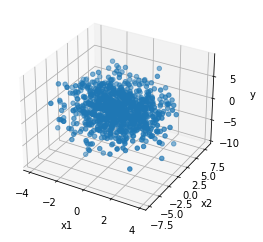

In [401]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x1,x2,t)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

# Experiment 11
* In this experiment, we are plotting the surfaces produced by experiments 3, 5 and 9.
    * *Note: The surfaces for experiment 3 and 9 are the same. Thus only two surfaces are graphed*
* Again, we are using `matplotlib` to plot these coordinates

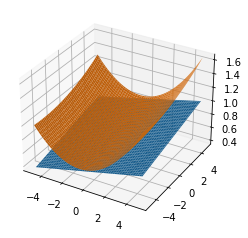

In [402]:
x1_11 = np.linspace(-5,5,100)
x2_11 = np.linspace(-5,5,100)
x,y = np.meshgrid(x1_11,x2_11)

def create_surface_3(x,y):
    return w[0] + w[1] * x + w[2] * y

def create_surface_5(x,y):
    return wq[0] + (x*wq[1]) + (y*wq[2]) + ((x**2)*wq[3]) + ((y**2)*wq[4])

y3 = create_surface_3(x,y)
y5 = create_surface_5(x,y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, y3)
ax.plot_surface(x, y, y5)

# Experiment 12
* Here, we are plotting the best fit model (the linear model) against the scatter plot created in experiment 10.
* This is the last time we are using `matplotlib`

## Results from this experiment
* When looking on the x-y plane, the data points are enclosed in the red plane.
* When looking at the x-z or y-z planes, the data points appear above and below, suggesting that the model is not an exact fit.
    * Furthermore, this could suggest that something was done to the data that varies their position along the z-axis.

(-5.0, 5.0)

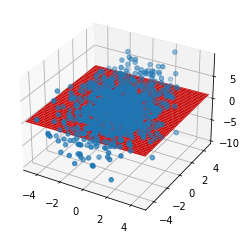

In [403]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, y3, color='red')
ax.scatter(x1,x2,t)
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)